In [75]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/GS7271/Documents/MSDS7331/Project/train_set.csv')

del df['tube_assembly']
del df['tube_assembly.1']
del df['spec10']

df['quote_date'] = pd.to_datetime(df['quote_date'],format="%Y-%m-%d")

df = df.replace("Y", 1)
df = df.replace("N", 0)
df = df.replace("Yes", 1)
df = df.replace("No", 0)

df['bracket_pricing']=df['bracket_pricing'].astype('bool')
df['end_a_1x']=df['end_a_1x'].astype('bool')
df['end_a_2x']=df['end_a_2x'].astype('bool')
df['end_x_1x']=df['end_x_1x'].astype('bool')
df['end_x_2x']=df['end_x_2x'].astype('bool')

continuous_features = ['cost', 'diameter', 'wall', 'length', 'bend_radius']
categ_features = ['tube_assembly_id', 'supplier', 'spec1', 'spec2', 'spec3', 'spec4', 'spec5', 'spec6', 'spec7', 'spec8', 'spec9', 'material_id','end_a', 'end_x']
boolean_features = ['bracket_pricing','end_a_1x', 'end_a_2x', 'end_x_1x', 'end_x_2x']
integer_features = ['annual_usage', 'min_order_quantity', 'quantity', 'num_bends', 'num_boss', 'num_bracket', 'other']

df[integer_features] = df[integer_features].astype(np.int64)

print(df.info())
df.dtypes
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30213 entries, 0 to 30212
Data columns (total 32 columns):
tube_assembly_id      30213 non-null object
supplier              30213 non-null object
quote_date            30213 non-null datetime64[ns]
annual_usage          30213 non-null int64
min_order_quantity    30213 non-null int64
bracket_pricing       30213 non-null bool
quantity              30213 non-null int64
cost                  30213 non-null float64
spec1                 5797 non-null object
spec2                 5551 non-null object
spec3                 4650 non-null object
spec4                 3336 non-null object
spec5                 2312 non-null object
spec6                 1687 non-null object
spec7                 306 non-null object
spec8                 56 non-null object
spec9                 4 non-null object
material_id           29984 non-null object
diameter              30213 non-null float64
wall                  30213 non-null float64
length              

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,spec1,spec2,...,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
30208,TA-21190,S-0041,2013-09-10,869,75,False,75,5.945260,NaN,NaN,...,31.75,False,False,False,False,EF-003,EF-018,0,0,0
30209,TA-21191,S-0041,2013-09-10,752,1,False,1,6.131658,SP-0007,SP-0024,...,31.75,False,False,False,False,EF-003,EF-018,0,0,0
30210,TA-21195,S-0041,2013-08-05,1,80,False,80,5.066130,NaN,NaN,...,38.10,False,False,False,False,EF-003,EF-009,0,0,0
30211,TA-21196,S-0062,2005-05-09,422,1,False,1,18.214141,SP-0007,SP-0080,...,50.80,True,True,False,False,EF-003,EF-017,0,0,0
30212,TA-21197,S-0026,2009-07-30,3,1,False,1,53.618624,SP-0007,SP-0080,...,50.80,True,True,False,False,EF-003,EF-017,0,0,0


In [77]:
df.describe()

,annual_usage,min_order_quantity,quantity,cost,diameter,wall,length,num_bends,bend_radius,num_boss,num_bracket,other
count,30213.000000,30213.000000,30213.000000,30213.000000,30213.000000,30213.000000,30213.000000,30213.000000,30213.000000,30213.000000,30213.000000,30213.000000
mean,120.369377,2.084699,38.389369,13.433317,17.223018,1.384782,97.647605,3.813061,42.231223,0.025254,0.003542,0.013603
std,1590.331872,12.742776,70.761392,28.663200,18.125973,0.638610,63.230131,2.199564,200.313458,0.184975,0.069664,0.150840
min,0.000000,0.000000,1.000000,0.503553,3.180000,0.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,3.878190,9.520000,0.890000,48.000000,2.000000,19.050000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,10.000000,6.521146,12.700000,1.240000,86.000000,3.000000,31.750000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,40.000000,13.431781,19.050000,1.650000,133.000000,5.000000,50.800000,0.000000,0.000000,0.000000
max,150000.000000,535.000000,2500.000000,1000.000000,203.200000,7.900000,1333.000000,17.000000,9999.000000,5.000000,3.000000,8.000000


In [79]:
pd.get_dummies(df['bracket_pricing'], prefix = "bracket", drop_first = True)

,bracket_True
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


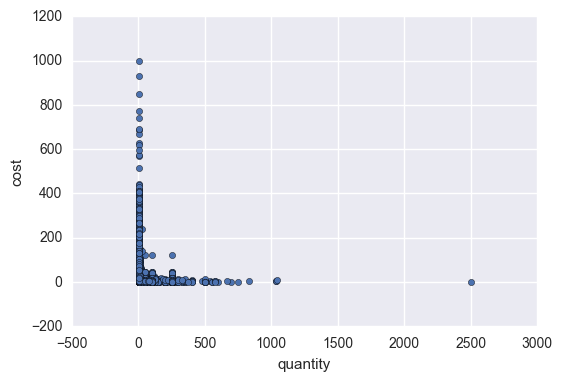

In [81]:
df.plot.scatter(x = 'quantity', y = 'cost')

In [112]:
df_grouped = df.groupby(by = ['tube_assembly_id','supplier', 'material_id'])

In [113]:
fixed_cost = df.groupby(by = 'tube_assembly_id').max().cost - df.groupby(by = 'tube_assembly_id').min().cost
variable_cost = df.groupby(by = 'tube_assembly_id').min().cost

In [114]:
df_grouped

In [115]:
fixed_cost

tube_assembly_id
TA-00002     18.906873
TA-00004     18.906873
TA-00005     23.477796
TA-00012     18.904091
TA-00013      0.000000
TA-00014     18.906873
TA-00021      0.000000
TA-00022      0.000000
TA-00024     18.904091
TA-00025     18.904091
TA-00027      0.000000
TA-00028      6.557313
TA-00031     17.387869
TA-00034     89.195595
TA-00037      0.000000
TA-00046      0.000000
TA-00047      0.000000
TA-00048      0.000000
TA-00052     23.477796
TA-00054     22.211960
TA-00056     23.477796
TA-00058      5.463964
TA-00061     18.904091
TA-00062      0.000000
TA-00063      0.000000
TA-00064      0.000000
TA-00066      0.000000
TA-00068      0.000000
TA-00073      0.000000
TA-00076     18.906873
               ...    
TA-21137      0.000000
TA-21141      0.000000
TA-21142     10.927928
TA-21148      0.000000
TA-21152      0.000000
TA-21155    120.582786
TA-21158      0.000000
TA-21159      0.000000
TA-21161      0.000000
TA-21163     10.229631
TA-21164      0.000000
TA-21165      0.0

In [116]:
frames = [df_grouped, fixed_cost, variable_cost]

In [117]:
result = pd.concat(frames)

TypeError: cannot concatenate a non-NDFrame object